# developer: Mohammad mehdi Sahraei

### importing libraries

In [14]:
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

### for preparing 

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


num_class = y_test.shape[1] #10


170498071/170498071 [==============================] - 6s 0us/step


### for creating layers

In [17]:

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2)) # Dropout is used for turning off Neurons To prevent other neurons from becoming lazy
model.add(BatchNormalization()) # BatchNormalization does normal result for each layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(num_class, activation = 'softmax')) #softmax shows that which is the best result between outputs 0-1 


model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # categorical_crossentropy: for revising loss

model.summary() 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)       

### training model

In [18]:

# batch_size: for example = 50000/64 = 782
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)


Epoch 1/30
782/782 [==============================] - 18s 12ms/step - loss: 1.4762 - accuracy: 0.4735 - val_loss: 1.1482 - val_accuracy: 0.5900
Epoch 2/30
782/782 [==============================] - 8s 11ms/step - loss: 1.0530 - accuracy: 0.6298 - val_loss: 0.8499 - val_accuracy: 0.7018
Epoch 3/30
782/782 [==============================] - 8s 11ms/step - loss: 0.8960 - accuracy: 0.6862 - val_loss: 0.7414 - val_accuracy: 0.7413
Epoch 4/30
782/782 [==============================] - 9s 11ms/step - loss: 0.8154 - accuracy: 0.7160 - val_loss: 0.7520 - val_accuracy: 0.7372
Epoch 5/30
782/782 [==============================] - 8s 11ms/step - loss: 0.7501 - accuracy: 0.7388 - val_loss: 0.6920 - val_accuracy: 0.7545
Epoch 6/30
782/782 [==============================] - 8s 11ms/step - loss: 0.7018 - accuracy: 0.7548 - val_loss: 0.6333 - val_accuracy: 0.7761
Epoch 7/30
782/782 [==============================] - 8s 11ms/step - loss: 0.6598 - accuracy: 0.7696 - val_loss: 0.6302 - val_accuracy: 0.783

### Learning graph

loss
accuracy
val_loss
val_accuracy


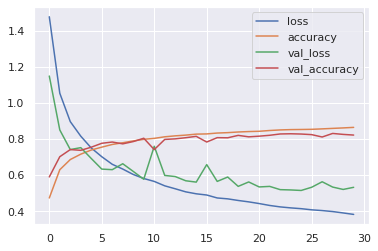

In [19]:
for key,val in history.history.items():
  print(key)

pd.DataFrame(history.history).plot()


### test

In [49]:

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

model.save('fisrtmodel.h5')
loader = load_model('fisrtmodel.h5')

loader.predict(X_test[0:10])[0]



1/1 [==============================] - 0s 116ms/step


array([1.2860210e-04, 2.1465319e-06, 4.9034079e-05, 7.6796448e-01,
       6.4661463e-06, 2.3136199e-01, 4.1779113e-04, 7.4780837e-06,
       6.1504506e-05, 4.4566184e-07], dtype=float32)

In [48]:
y_test[0]


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [51]:
labels[3]

'cat'

### for showing and testing

In [52]:

# y_test = y_test.astype(int)
# predictions = predictions.astype(int)

# fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False, sharey=True, figsize=(17, 8))
# index = 0
# for i in range(3):
#     for j in range(7):
#         axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
#                             + 'predicted:' + labels[predictions[index][0]])
#         axes[i,j].imshow(X_test[index], cmap='gray')
#         axes[i,j].get_xaxis().set_visible(False)
#         axes[i,j].get_yaxis().set_visible(False)
#         index += 1

# plt.show()